# Lab3 Assignment - _Velon Murugathas_

## 1. Frame the problem and look at the big picture

<p> The goal of this study is to create a prediction model to predict the progression of disease in diabetes patients one year. In order to accurately anticipate the course of the disease in diabetics, this prediction model aims to develop a quantitative link between BMI and disease progression.</p>

## 2. Get the data

In [36]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#### Loading the diabetes dataset

In [37]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

#### Splitting the dataset into training and testing sets

In [38]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_X[:, np.newaxis, 2], diabetes_y, test_size=0.2, random_state=42)

#### Creating and fitting a linear regression model

In [39]:
model = LinearRegression()                                     
model.fit(X_train, y_train)

LinearRegression()

#### Making predictions on training and testing data sets

In [40]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#### Extract the model's parameters

In [41]:
slope = model.coef_[0]
intercept = model.intercept_

## 3. Explore the data to gain insights

#### Correlation matrix Heatmap

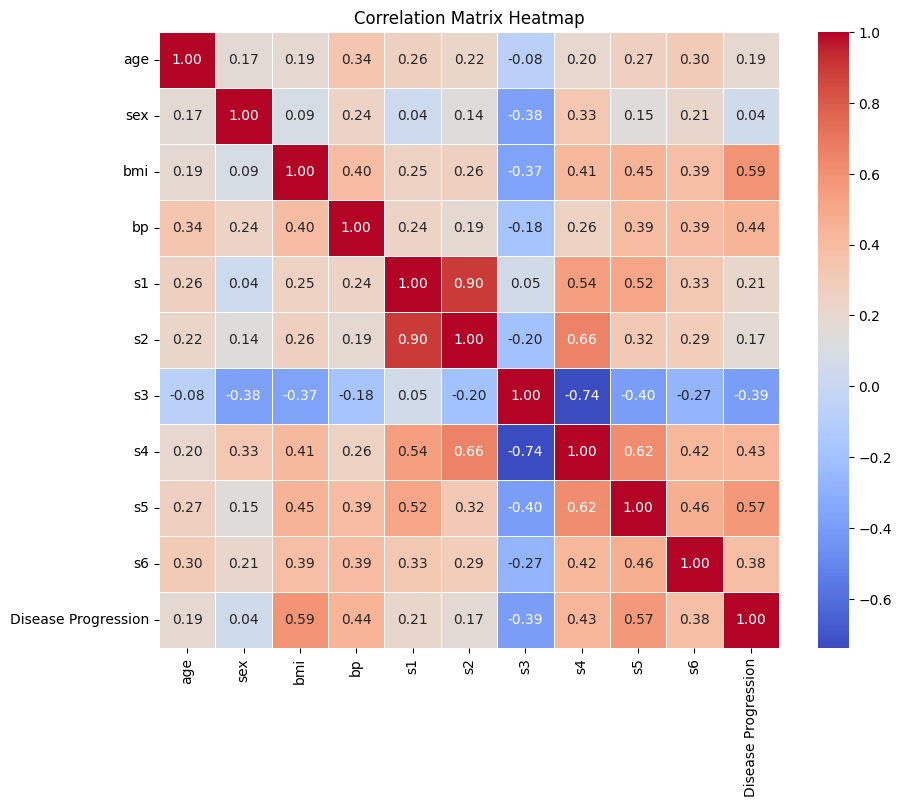

In [42]:
feature_names = datasets.load_diabetes()['feature_names']                   # Creating a DataFrame with feature names
diabetes_df = pd.DataFrame(diabetes_X, columns=feature_names)

diabetes_df['Disease Progression'] = diabetes_y                             # Adding the target variable to the DataFrame

correlation_matrix = diabetes_df.corr()                                     # Calculate the correlation matrix

plt.figure(figsize=(10, 8))                                                 # Create the heatmap

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Generating a visual representation of the univariate linear regression model's performance

#### Scatterplot Diagram

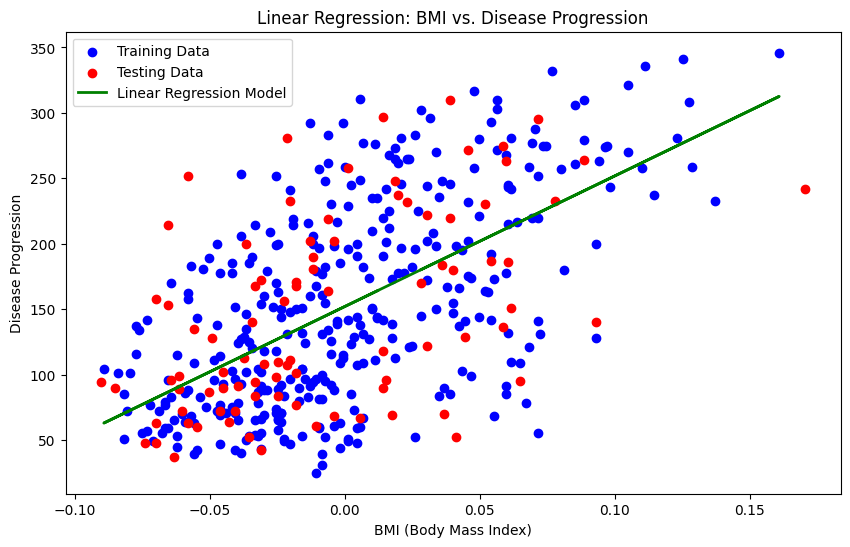

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.plot(X_train, y_train_pred, color='green', linewidth=2, label='Linear Regression Model')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Disease Progression')
plt.title('Linear Regression: BMI vs. Disease Progression')
plt.legend()
plt.show()

## 6. Fine-tune your models and combine them into a great solution

#### Calculate the mean squared error (loss)

In [44]:
train_loss = mean_squared_error(y_train, y_train_pred)
test_loss = mean_squared_error(y_test, y_test_pred)

#### Residuals vs Fitted Graphs

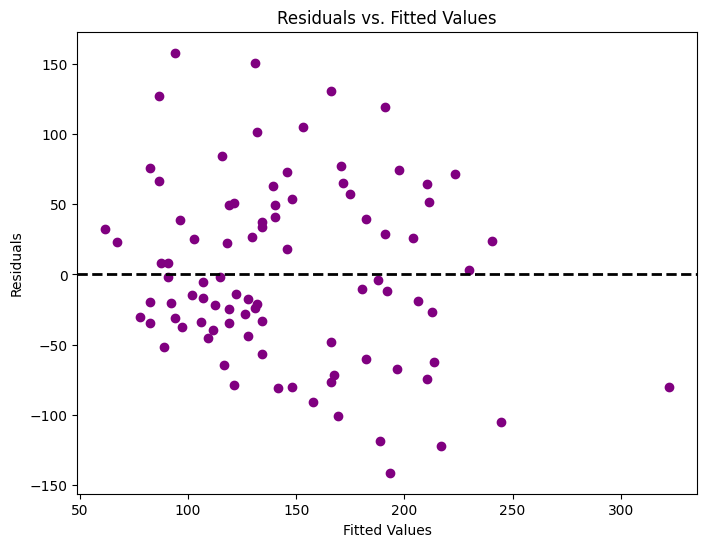

In [45]:
import matplotlib.pyplot as plt

# Residual vs. Fitted Values Plot
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals, color='purple')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.show()

## 7. Present your solution

<p> Upon examining the correlation matrix heatmap, it is discernible that the Body Mass Index (BMI) exhibits the highest correlation with the predictive disease progression. 
The residual-fit graph represented how much the model's prediction varies from actual data points. There were no patterns observed and most of residuals are scattered closer the zero line. Therefore I conclude this as a good or a fair fit. It makes this model valid.</p>